## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.131329  1.172135  1.155710 -0.777716  0.553262  0.575491
1  0.428244  1.833275  0.432252  0.169399  0.462256  0.786099
2 -1.526648 -1.186517 -1.579507  0.068488 -0.626468 -0.593965
3 -1.008219 -0.816743  0.273100 -0.298225  1.410386 -0.866618
4 -1.190211  1.776664 -0.853460 -0.609706  1.163076 -0.284941


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0203022	total: 68.1ms	remaining: 1m 8s
1:	learn: 1.0095834	total: 68.7ms	remaining: 34.3s
2:	learn: 0.9988002	total: 69.5ms	remaining: 23.1s
3:	learn: 0.9874874	total: 70.1ms	remaining: 17.4s
4:	learn: 0.9784948	total: 70.6ms	remaining: 14.1s
5:	learn: 0.9696525	total: 71.1ms	remaining: 11.8s
6:	learn: 0.9595238	total: 72.5ms	remaining: 10.3s
7:	learn: 0.9504840	total: 73.1ms	remaining: 9.06s
8:	learn: 0.9410519	total: 73.5ms	remaining: 8.1s
9:	learn: 0.9314794	total: 74ms	remaining: 7.32s
10:	learn: 0.9247857	total: 74.5ms	remaining: 6.7s
11:	learn: 0.9146084	total: 75ms	remaining: 6.17s
12:	learn: 0.9056042	total: 75.5ms	remaining: 5.73s
13:	learn: 0.8960662	total: 76.1ms	remaining: 5.36s
14:	learn: 0.8872238	total: 76.7ms	remaining: 5.03s
15:	learn: 0.8791564	total: 77.2ms	remaining: 4.75s
16:	learn: 0.8713803	total: 77.7ms	remaining: 4.49s
17:	learn: 0.8636106	total: 78.2ms	remaining: 4.27s
18:	learn: 0.8550457	total: 78.7ms	remaining: 4.06

85:	learn: 0.4739656	total: 109ms	remaining: 1.16s
86:	learn: 0.4700371	total: 110ms	remaining: 1.15s
87:	learn: 0.4670211	total: 110ms	remaining: 1.14s
88:	learn: 0.4633286	total: 111ms	remaining: 1.14s
89:	learn: 0.4595577	total: 111ms	remaining: 1.13s
90:	learn: 0.4552184	total: 112ms	remaining: 1.12s
91:	learn: 0.4509429	total: 113ms	remaining: 1.11s
92:	learn: 0.4479439	total: 113ms	remaining: 1.1s
93:	learn: 0.4442841	total: 113ms	remaining: 1.09s
94:	learn: 0.4412925	total: 114ms	remaining: 1.09s
95:	learn: 0.4376588	total: 115ms	remaining: 1.08s
96:	learn: 0.4342284	total: 115ms	remaining: 1.07s
97:	learn: 0.4311761	total: 116ms	remaining: 1.06s
98:	learn: 0.4277187	total: 116ms	remaining: 1.05s
99:	learn: 0.4244895	total: 117ms	remaining: 1.05s
100:	learn: 0.4209903	total: 117ms	remaining: 1.04s
101:	learn: 0.4179375	total: 117ms	remaining: 1.03s
102:	learn: 0.4148370	total: 118ms	remaining: 1.03s
103:	learn: 0.4116704	total: 118ms	remaining: 1.02s
104:	learn: 0.4083980	total:

240:	learn: 0.1538219	total: 188ms	remaining: 592ms
241:	learn: 0.1527402	total: 189ms	remaining: 591ms
242:	learn: 0.1516287	total: 189ms	remaining: 589ms
243:	learn: 0.1505813	total: 190ms	remaining: 587ms
244:	learn: 0.1495826	total: 190ms	remaining: 585ms
245:	learn: 0.1483974	total: 190ms	remaining: 584ms
246:	learn: 0.1474339	total: 191ms	remaining: 582ms
247:	learn: 0.1465618	total: 191ms	remaining: 580ms
248:	learn: 0.1455863	total: 192ms	remaining: 578ms
249:	learn: 0.1448438	total: 192ms	remaining: 577ms
250:	learn: 0.1439695	total: 193ms	remaining: 575ms
251:	learn: 0.1428251	total: 193ms	remaining: 574ms
252:	learn: 0.1418699	total: 194ms	remaining: 573ms
253:	learn: 0.1407978	total: 194ms	remaining: 571ms
254:	learn: 0.1398942	total: 195ms	remaining: 570ms
255:	learn: 0.1390538	total: 195ms	remaining: 568ms
256:	learn: 0.1381720	total: 196ms	remaining: 567ms
257:	learn: 0.1373221	total: 197ms	remaining: 565ms
258:	learn: 0.1363527	total: 197ms	remaining: 564ms
259:	learn: 

459:	learn: 0.0434010	total: 294ms	remaining: 345ms
460:	learn: 0.0431005	total: 294ms	remaining: 344ms
461:	learn: 0.0428885	total: 295ms	remaining: 343ms
462:	learn: 0.0426847	total: 295ms	remaining: 342ms
463:	learn: 0.0424115	total: 296ms	remaining: 341ms
464:	learn: 0.0422069	total: 296ms	remaining: 341ms
465:	learn: 0.0419893	total: 297ms	remaining: 340ms
466:	learn: 0.0417918	total: 297ms	remaining: 339ms
467:	learn: 0.0415134	total: 297ms	remaining: 338ms
468:	learn: 0.0413175	total: 298ms	remaining: 337ms
469:	learn: 0.0411260	total: 298ms	remaining: 336ms
470:	learn: 0.0408557	total: 299ms	remaining: 336ms
471:	learn: 0.0406766	total: 300ms	remaining: 335ms
472:	learn: 0.0404885	total: 300ms	remaining: 335ms
473:	learn: 0.0403007	total: 301ms	remaining: 334ms
474:	learn: 0.0400848	total: 301ms	remaining: 333ms
475:	learn: 0.0398724	total: 301ms	remaining: 332ms
476:	learn: 0.0396629	total: 302ms	remaining: 331ms
477:	learn: 0.0394399	total: 302ms	remaining: 330ms
478:	learn: 

622:	learn: 0.0228143	total: 372ms	remaining: 225ms
623:	learn: 0.0227301	total: 372ms	remaining: 224ms
624:	learn: 0.0226787	total: 372ms	remaining: 223ms
625:	learn: 0.0226071	total: 373ms	remaining: 223ms
626:	learn: 0.0225038	total: 373ms	remaining: 222ms
627:	learn: 0.0223879	total: 374ms	remaining: 221ms
628:	learn: 0.0223556	total: 374ms	remaining: 221ms
629:	learn: 0.0222551	total: 375ms	remaining: 220ms
630:	learn: 0.0222234	total: 375ms	remaining: 219ms
631:	learn: 0.0221247	total: 376ms	remaining: 219ms
632:	learn: 0.0220936	total: 376ms	remaining: 218ms
633:	learn: 0.0219967	total: 377ms	remaining: 217ms
634:	learn: 0.0219346	total: 377ms	remaining: 217ms
635:	learn: 0.0218005	total: 377ms	remaining: 216ms
636:	learn: 0.0217705	total: 378ms	remaining: 215ms
637:	learn: 0.0216761	total: 378ms	remaining: 215ms
638:	learn: 0.0216371	total: 379ms	remaining: 214ms
639:	learn: 0.0215489	total: 380ms	remaining: 213ms
640:	learn: 0.0214396	total: 380ms	remaining: 213ms
641:	learn: 

835:	learn: 0.0111578	total: 478ms	remaining: 93.8ms
836:	learn: 0.0111433	total: 479ms	remaining: 93.2ms
837:	learn: 0.0111058	total: 479ms	remaining: 92.6ms
838:	learn: 0.0110611	total: 480ms	remaining: 92ms
839:	learn: 0.0110210	total: 480ms	remaining: 91.4ms
840:	learn: 0.0110077	total: 480ms	remaining: 90.8ms
841:	learn: 0.0109683	total: 481ms	remaining: 90.2ms
842:	learn: 0.0109316	total: 481ms	remaining: 89.6ms
843:	learn: 0.0108987	total: 482ms	remaining: 89ms
844:	learn: 0.0108850	total: 482ms	remaining: 88.5ms
845:	learn: 0.0108466	total: 483ms	remaining: 87.9ms
846:	learn: 0.0108146	total: 483ms	remaining: 87.3ms
847:	learn: 0.0107906	total: 483ms	remaining: 86.7ms
848:	learn: 0.0107631	total: 484ms	remaining: 86.1ms
849:	learn: 0.0107505	total: 484ms	remaining: 85.5ms
850:	learn: 0.0107118	total: 485ms	remaining: 84.9ms
851:	learn: 0.0106885	total: 485ms	remaining: 84.3ms
852:	learn: 0.0106511	total: 486ms	remaining: 83.7ms
853:	learn: 0.0106284	total: 486ms	remaining: 83.1

998:	learn: 0.0058076	total: 555ms	remaining: 556us
999:	learn: 0.0057807	total: 556ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

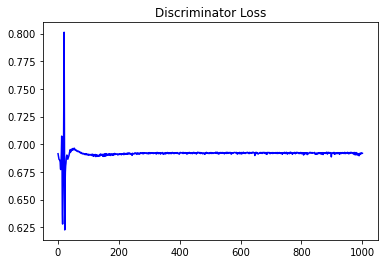

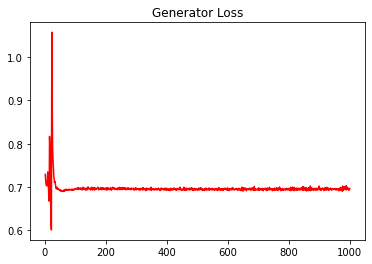

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1206357017569149


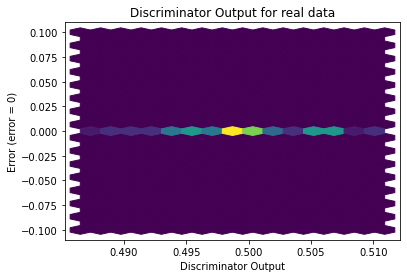

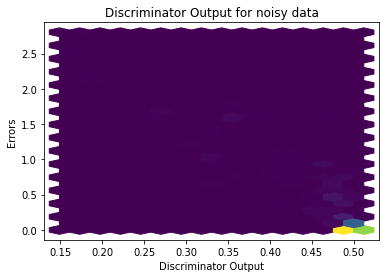

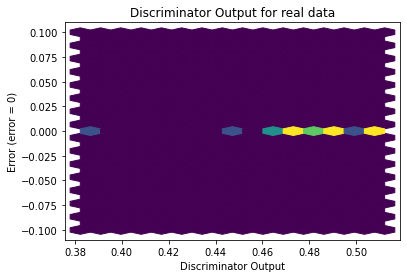

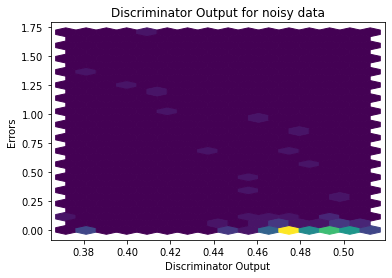

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


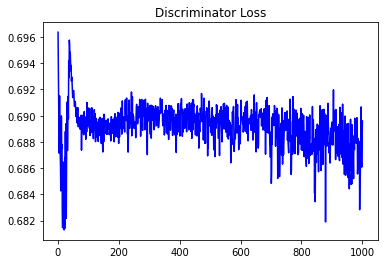

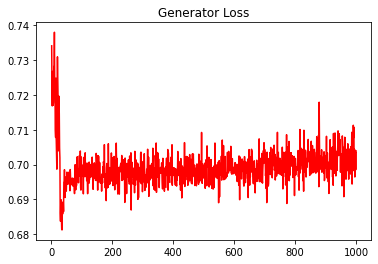

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06079643823768716


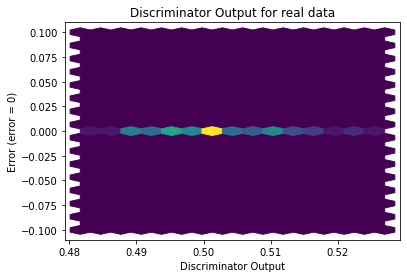

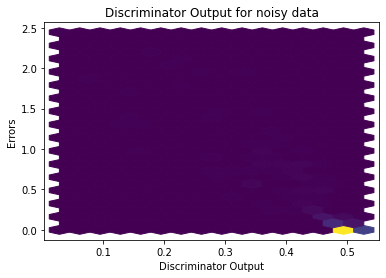

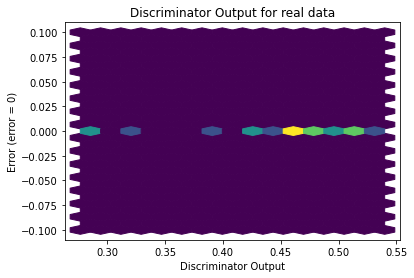

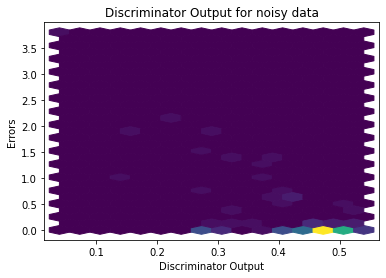

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1376]], requires_grad=True)
